In [1]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

#url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
    'start':'1',
    'limit':'15',
    #'limit':'5000',
    'convert':'USD'
}
headers = {
    'Accepts': 'application/json',
    #'X-CMC_PRO_API_KEY': 'your_actual_api_key_here',
    'X-CMC_PRO_API_KEY': 'your_actual_api_key_here',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# Use: jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
# in an anaconda prompt and load the local host url to get the rate limit updated version of the notebook


In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all columns instead of a limited set
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982580e+07,1.982580e+07,False,NaN,1,NaN,NaN,None,2025-02-18T02:13:00.000Z,96222.760368,2.798575e+10,57.2726,0.243389,-0.211656,-1.719917,-8.085748,-0.392154,4.873579,1.907693e+12,59.8242,2.020678e+12,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
1,1027,Ethereum,ETH,ethereum,9933,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205568e+08,1.205568e+08,True,NaN,2,NaN,NaN,None,2025-02-18T02:13:00.000Z,2729.144004,2.456874e+10,123.4834,0.020066,1.922007,1.444943,-18.461875,-19.672467,-11.825741,3.290168e+11,10.3155,3.290168e+11,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-18T02:13:00.000Z,2.660291,4.744703e+09,41.7601,0.521892,-3.414896,8.540771,-18.781099,15.443749,140.933292,1.538150e+11,4.8225,2.660291e+11,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
3,825,Tether USDt,USDT,tether,116971,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.417624e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-18T02:13:00.000Z,0.999935,7.387403e+10,56.4282,-0.012744,-0.016773,-0.024680,0.083169,0.121516,-0.157339,1.417531e+11,4.4453,1.435574e+11,None,2025-02-18T02:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-18 02:15:12.886361
4,1839,BNB,BNB,bnb,2365,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424773e+08,1.424773e+08,False,NaN,5,NaN,NaN,None,2025-02-18T02:13:00.000Z,664.711434,1.915336e+09,-5.7686,-0.064918,-0.984778,7.463929,-6.717965,-0.557733,8.530464,9.470631e+10,2.9699,9.470631e+10,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.883894e+08,5.942273e+08,True,NaN,6,NaN,NaN,None,2025-02-18T02:13:00.000Z,177.841570,4.489754e+09,108.3788,-0.087958,-5.708093,-12.330163,-30.674854,-9.006420,-24.068853,8.685594e+10,2.7238,1.056783e+11,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
6,3408,USDC,USDC,usd-coin,25736,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.647083e+10,5.647083e+10,False,NaN,7,NaN,NaN,None,2025-02-18T02:13:00.000Z,0.999931,6.972504e+09,61.0146,-0.014182,-0.001461,-0.007591,-0.016773,-0.006100,-0.006075,5.646695e+10,1.7708,5.646695e+10,None,2025-02-18T02:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-18 02:15:12.886361
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.480908e+11,1.480908e+11,True,NaN,8,NaN,NaN,None,2025-02-18T02:13:00.000Z,0.258407,1.367449e+09,40.3588,0.242445,-3.524268,-0.279793,-35.991541,-18.640000,-32.894865,3.826768e+10,1.2001,3.826768e+10,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
8,2010,Cardano,ADA,cardano,1461,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",

In [5]:
def api_runner():
    global df
    #Original sandbox environment, url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        #'limit':'5000',
        'convert':'USD'
        }
    headers = {
        'Accepts': 'application/json',
        #'X-CMC_PRO_API_KEY': 'your_actual_api_key_here',
        'X-CMC_PRO_API_KEY': 'your_actual_api_key_here',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
       response = session.get(url, params=parameters)
       data = json.loads(response.text)
       #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
       print(e)

# Use: jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10
# in an anaconda prompt and load the local host url to get the rate limit updated version of the notebook

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
# Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\YourName\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\YourName\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\YourName\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\YourName\OneDrive\Documents\Python Scripts\API.csv'
# If that doesn't work try using the local host URL as with the issue with the rate limit, above

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully


KeyboardInterrupt: 

In [ ]:
#To perform this step, output api_runner code to .csv. Once done, run the two lines of code, below.
df72 = pd.read_csv(r'C:\Users\YourName\OneDrive\Documents\Python Scripts\API.csv')
df72

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.982580e+07,1.982580e+07,False,NaN,1,NaN,NaN,None,2025-02-18T02:13:00.000Z,96222.760368,2.798575e+10,57.2726,0.243389,-0.211656,-1.719917,-8.085748,-0.392154,4.873579,1.907693e+12,59.8242,2.020678e+12,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
1,1027,Ethereum,ETH,ethereum,9933,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205568e+08,1.205568e+08,True,NaN,2,NaN,NaN,None,2025-02-18T02:13:00.000Z,2729.144004,2.456874e+10,123.4834,0.020066,1.922007,1.444943,-18.461875,-19.672467,-11.825741,3.290168e+11,10.3155,3.290168e+11,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.781886e+10,9.998645e+10,False,NaN,3,NaN,NaN,None,2025-02-18T02:13:00.000Z,2.660291,4.744703e+09,41.7601,0.521892,-3.414896,8.540771,-18.781099,15.443749,140.933292,1.538150e+11,4.8225,2.660291e+11,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
3,825,Tether USDt,USDT,tether,116971,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.417624e+11,1.435668e+11,True,NaN,4,NaN,NaN,None,2025-02-18T02:13:00.000Z,0.999935,7.387403e+10,56.4282,-0.012744,-0.016773,-0.024680,0.083169,0.121516,-0.157339,1.417531e+11,4.4453,1.435574e+11,None,2025-02-18T02:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-18 02:15:12.886361
4,1839,BNB,BNB,bnb,2365,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424773e+08,1.424773e+08,False,NaN,5,NaN,NaN,None,2025-02-18T02:13:00.000Z,664.711434,1.915336e+09,-5.7686,-0.064918,-0.984778,7.463929,-6.717965,-0.557733,8.530464,9.470631e+10,2.9699,9.470631e+10,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.883894e+08,5.942273e+08,True,NaN,6,NaN,NaN,None,2025-02-18T02:13:00.000Z,177.841570,4.489754e+09,108.3788,-0.087958,-5.708093,-12.330163,-30.674854,-9.006420,-24.068853,8.685594e+10,2.7238,1.056783e+11,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
6,3408,USDC,USDC,usd-coin,25736,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.647083e+10,5.647083e+10,False,NaN,7,NaN,NaN,None,2025-02-18T02:13:00.000Z,0.999931,6.972504e+09,61.0146,-0.014182,-0.001461,-0.007591,-0.016773,-0.006100,-0.006075,5.646695e+10,1.7708,5.646695e+10,None,2025-02-18T02:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-18 02:15:12.886361
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.480908e+11,1.480908e+11,True,NaN,8,NaN,NaN,None,2025-02-18T02:13:00.000Z,0.258407,1.367449e+09,40.3588,0.242445,-3.524268,-0.279793,-35.991541,-18.640000,-32.894865,3.826768e+10,1.2001,3.826768e+10,None,2025-02-18T02:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
8,2010,Cardano,ADA,cardano,1461,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",

In [8]:
# One thing I noticed was the scientific notation in multiple fields. 
# I like it, but I want to be able to see human readable numbers in this case.

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11945,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19825796.00000,19825796.00000,False,nan,1,nan,nan,None,2025-02-18T02:13:00.000Z,96222.76037,27985747898.50185,57.27260,0.24339,-0.21166,-1.71992,-8.08575,-0.39215,4.87358,1907692817610.64111,59.82420,2020677967725.65991,None,2025-02-18T02:13:00.000Z,nan,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
1,1027,Ethereum,ETH,ethereum,9933,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120556761.34775,120556761.34775,True,nan,2,nan,nan,None,2025-02-18T02:13:00.000Z,2729.14400,24568740813.03287,123.48340,0.02007,1.92201,1.44494,-18.46188,-19.67247,-11.82574,329016762338.05127,10.31550,329016762338.04999,None,2025-02-18T02:13:00.000Z,nan,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
2,52,XRP,XRP,xrp,1534,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57818864895.00000,99986451428.00000,False,nan,3,nan,nan,None,2025-02-18T02:13:00.000Z,2.66029,4744703327.72429,41.76010,0.52189,-3.41490,8.54077,-18.78110,15.44375,140.93329,153815008932.96783,4.82250,266029105227.67999,None,2025-02-18T02:13:00.000Z,nan,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
3,825,Tether USDt,USDT,tether,116971,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",nan,141762384601.69476,143566824799.22211,True,nan,4,nan,nan,None,2025-02-18T02:13:00.000Z,0.99993,73874027384.41527,56.42820,-0.01274,-0.01677,-0.02468,0.08317,0.12152,-0.15734,141753099575.37732,4.44530,143557421587.29001,None,2025-02-18T02:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-02-18 02:15:12.886361
4,1839,BNB,BNB,bnb,2365,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,142477325.49000,142477325.49000,False,nan,5,nan,nan,None,2025-02-18T02:13:00.000Z,664.71143,1915336185.34308,-5.76860,-0.06492,-0.98478,7.46393,-6.71797,-0.55773,8.53046,94706307331.81978,2.96990,94706307331.82001,None,2025-02-18T02:13:00.000Z,nan,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
5,5426,Solana,SOL,solana,840,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",nan,488389393.69651,594227347.88188,True,nan,6,nan,nan,None,2025-02-18T02:13:00.000Z,177.84157,4489754280.85760,108.37880,-0.08796,-5.70809,-12.33016,-30.67485,-9.00642,-24.06885,86855936356.57317,2.72380,105678324253.36000,None,2025-02-18T02:13:00.000Z,nan,NaN,NaN,NaN,NaN,2025-02-18 02:15:12.886361
6,3408,USDC,USDC,usd-coin,25736,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,56470830181.11738,56470830181.11738,False,nan,7,nan,nan,None,2025-02-18T02:13:00.000Z,0.99993,6972504350.31112,61.01460,-0.01418,-0.00146,-0.00759,-0.01677,-0.00610,-0.00607,56466954237.54008,1.77080,56466954237.54000,None,2025-02-18T02:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-02-18 02:15:12.886361
7,74,Dogecoin,DOGE,dogecoin,1163,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",nan,148090786383.70523,148090786383.70523,True,nan,8,nan,nan,None,2025-02-18T02:13:00.000Z,0.25841,1367449381.48437,40.35880,0.24245,-3.52427,-0.27979,-35.99154,-18.64000,-32.89486,38267681916.59939,1.20010,38267681916.60000,None,2025-02-18T02

In [10]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.24339,-0.21166,-1.71992,-8.08575,-0.39215,4.87358
Ethereum,0.02007,1.92201,1.44494,-18.46188,-19.67247,-11.82574
XRP,0.52189,-3.41490,8.54077,-18.78110,15.44375,140.93329
Tether USDt,-0.01274,-0.01677,-0.02468,0.08317,0.12152,-0.15734
BNB,-0.06492,-0.98478,7.46393,-6.71797,-0.55773,8.53046
Solana,-0.08796,-5.70809,-12.33016,-30.67485,-9.00642,-24.06885
USDC,-0.01418,-0.00146,-0.00759,-0.01677,-0.00610,-0.00607
Dogecoin,0.24245,-3.52427,-0.27979,-35.99154,-18.64000,-32.89486
Cardano,0.63961,0.78563,7.15008,-29.47230,-10.45851,3.76661


In [11]:
# Now let's flatten the data into several columns for an alternate look at what we have
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.24339
             quote.USD.percent_change_24h    -0.21166
             quote.USD.percent_change_7d     -1.71992
             quote.USD.percent_change_30d    -8.08575
             quote.USD.percent_change_60d    -0.39215
             quote.USD.percent_change_90d     4.87358
Ethereum     quote.USD.percent_change_1h      0.02007
             quote.USD.percent_change_24h     1.92201
             quote.USD.percent_change_7d      1.44494
             quote.USD.percent_change_30d   -18.46188
             quote.USD.percent_change_60d   -19.67247
             quote.USD.percent_change_90d   -11.82574
XRP          quote.USD.percent_change_1h      0.52189
             quote.USD.percent_change_24h    -3.41490
             quote.USD.percent_change_7d      8.54077
             quote.USD.percent_change_30d   -18.78110
             quote.USD.percent_change_60d    15.44375
             quote.USD.percent_change_90

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.24339
            quote.USD.percent_change_24h  -0.21166
            quote.USD.percent_change_7d   -1.71992
            quote.USD.percent_change_30d  -8.08575
            quote.USD.percent_change_60d  -0.39215
            quote.USD.percent_change_90d   4.87358
Ethereum    quote.USD.percent_change_1h    0.02007
            quote.USD.percent_change_24h   1.92201
            quote.USD.percent_change_7d    1.44494
            quote.USD.percent_change_30d -18.46188
            quote.USD.percent_change_60d -19.67247
            quote.USD.percent_change_90d -11.82574
XRP         quote.USD.percent_change_1h    0.52189
            quote.USD.percent_change_24h  -3.41490
            quote.USD.percent_change_7d    8.54077
            quote.USD.percent_change_30d -18.78110
            quote.USD.percent_change_60d  15.44375
            quote.USD.percent_change_90d 140.93329
Tether USDt quote.USD.percent_change_1h   -0.01274
            quote.USD.percent_change_24h  -0.01677
            quote.USD.percent_change_7d   -0.02468
            quote.USD.percent_change_30d   0.08317
            quote.USD.percent_change_60d   0.12152
            quote.USD.percent_change_90d  -0.15734
BNB         quote.USD.percent_change_1h   -0.06492
            quote.USD.percent_change_24h  -0.98478
            quote.USD.percent_change_7d    7.46393
            quote.USD.percent_change_30d  -6.71797
            quote.USD.percent_change_60d  -0.55773
            quote.USD.percent_change_90d   8.53046
Solana      quote.USD.percent_change_1h   -0.08796
            quote.USD.percent_change_24h  -5.70809
            quote.USD.percent_change_7d  -12.33016
            quote.USD.percent_change_30d -30.67485
            quote.USD.percent_change_60d  -9.00642
            quote.USD.percent_change_90d -24.06885
USDC        quote.USD.percent_change_1h   -0.01418
            quote.USD.percent_change_24h  -0.00146
            quote.USD.percent_change_7d   -0.00759
            quote.USD.percent_change_30d  -0.01677
            quote.USD.percent_change_60d  -0.00610
            quote.USD.percent_change_90d  -0.00607
Dogecoin    quote.USD.percent_change_1h    0.24245
            quote.USD.percent_change_24h  -3.52427
            quote.USD.percent_change_7d   -0.27979
            quote.USD.percent_change_30d -35.99154
            quote.USD.percent_change_60d -18.64000
            quote.USD.percent_change_90d -32.89486
Cardano     quote.USD.percent_change_1h    0.63961
            quote.USD.percent_change_24h   0.78563
            quote.USD.percent_change_7d    7.15008
            quote.USD.percent_change_30d -29.47230
            quote.USD.percent_change_60d -10.45851
            quote.USD.percent_change_90d   3.76661
TRON        quote.USD.percent_change_1h    0.00914
            quote.USD.percent_change_24h  -0.57946
            quote.USD.percent_change_7d   -3.85395
            quote.USD.percent_change_30d  -2.38185
            quote.USD.percent_change_60d  -5.00259
            quote.USD.percent_change_90d  20.57023
Chainlink   quote.USD.percent_change_1h   -0.10574
            quote.USD.percent_change_24h   0.20937
            quote.USD.percent_change_7d   -1.61534
            quote.USD.percent_change_30d -22.19728
            quote.USD.percent_change_60d -18.06265
            quote.USD.percent_change_90d  31.21019
Avalanche   quote.USD.percent_change_1h   -0.41506
            quote.USD.percent_change_24h  -1.24456
            quote.USD.percent_change_7d   -5.28050
            quote.USD.percent_change_30d -38.12170
            quote.USD.percent_change_60d -36.96072
            quote.USD.percent_change_90d -25.97768
Stellar     quote.USD.percent_change_1h    0.16405
            quote.USD.percent_change_24h  -3.83267
            quote.USD.percent_change_7d    4.42813
            quote.USD.percent_change_30d -32.30879
            quote.USD.percent_change_60d -10.88189
            quo

In [14]:
# Let's do a quick count of the dataframe 5 record set
df5.count()

values    90
dtype: int64

In [25]:
# Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
# So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.24339
1,Bitcoin,quote.USD.percent_change_24h,-0.21166
2,Bitcoin,quote.USD.percent_change_7d,-1.71992
3,Bitcoin,quote.USD.percent_change_30d,-8.08575
4,Bitcoin,quote.USD.percent_change_60d,-0.39215
5,Bitcoin,quote.USD.percent_change_90d,4.87358
6,Ethereum,quote.USD.percent_change_1h,0.02007
7,Ethereum,quote.USD.percent_change_24h,1.92201
8,Ethereum,quote.USD.percent_change_7d,1.44494
9,Ethereum,quote.USD.percent_change_30d,-18.46188


In [26]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.24339
1,Bitcoin,quote.USD.percent_change_24h,-0.21166
2,Bitcoin,quote.USD.percent_change_7d,-1.71992
3,Bitcoin,quote.USD.percent_change_30d,-8.08575
4,Bitcoin,quote.USD.percent_change_60d,-0.39215
5,Bitcoin,quote.USD.percent_change_90d,4.87358
6,Ethereum,quote.USD.percent_change_1h,0.02007
7,Ethereum,quote.USD.percent_change_24h,1.92201
8,Ethereum,quote.USD.percent_change_7d,1.44494
9,Ethereum,quote.USD.percent_change_30d,-18.46188


In [27]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.24339
1,Bitcoin,24h,-0.21166
2,Bitcoin,7d,-1.71992
3,Bitcoin,30d,-8.08575
4,Bitcoin,60d,-0.39215
5,Bitcoin,90d,4.87358
6,Ethereum,quote.USD.percent_change_1h,0.02007
7,Ethereum,24h,1.92201
8,Ethereum,7d,1.44494
9,Ethereum,30d,-18.46188


In [28]:
# Let's grab our imports for visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

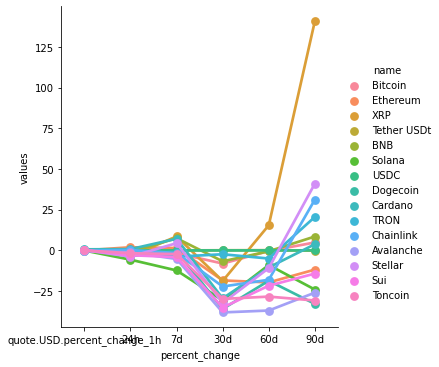

In [29]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [32]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

# May need to expand dataset for meaningful graph, but this gives a line graph of price over time for a single asset

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'XRP'")
df10

,name,quote.USD.price,timestamp
2,XRP,2.66029,2025-02-18 02:15:12.886361
2,XRP,2.66029,2025-02-18 02:15:13.116479


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

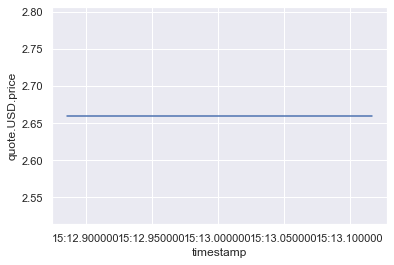

In [33]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)